In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [8]:
#Load the dataset
data = pd.read_csv("fincial_data.csv")

In [9]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [11]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [12]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

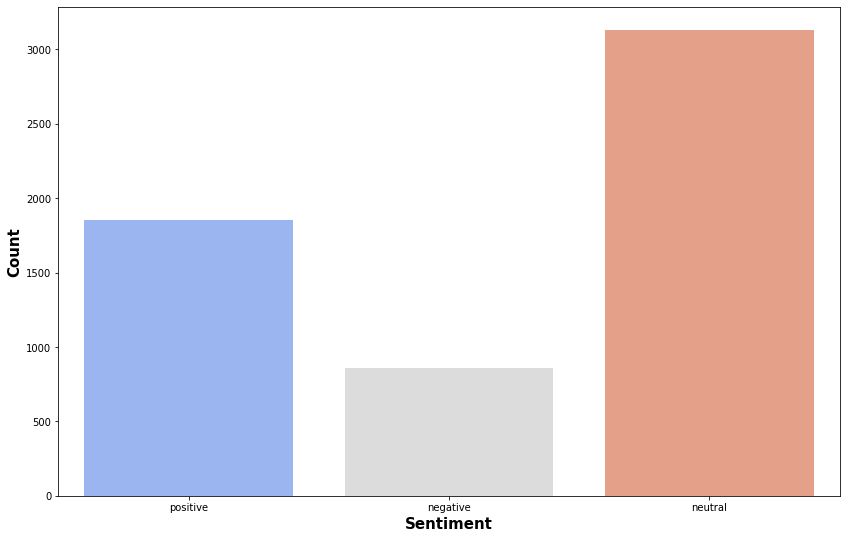

In [13]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

#Label Encoding

In [14]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


#Word cloud of Sentence Text

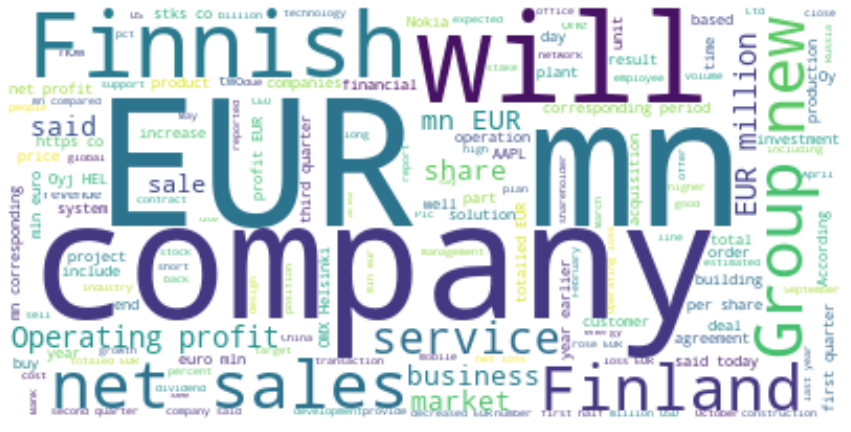

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Cleaning the Sentence

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
corpus[0:3]

['geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model',
 'esi low bk real possibl',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur']

#Creating the Bag of Words model

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[142  25  25]
 [289 211 143]
 [169  27 138]]


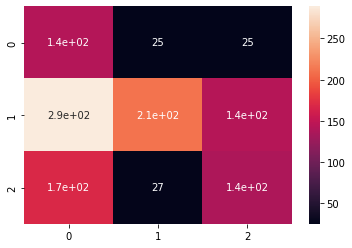

In [23]:
sns.heatmap(cm,annot =True)
plt.show()

In [24]:
acc_bow = accuracy_score(y_test, y_pred)

print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc_bow}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.42001710863986313


#Using TF - IDF Method.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [26]:
y=data['Sentiment']

In [27]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4381, 5000)
(1461, 5000)
(4381,)
(1461,)


In [29]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())

In [30]:
count_df

,aapl,aapl http,aapl http co,ab,ab inbev,ab sto,abb,abl,abp,abp hel,abp hel fisa,abroad,ac,ac drive,ac million,ac million us,ac million year,ac us,ac us helsinki,access,accessori,accommod,accord,accord ceo,accord compani,accord finnish,accord interim,accord interim report,account,account net,account net sale,account percent,account period,accumul,accus,acerta,acg,achiev,acknowledg,acquir,...,yara,yard,year,year ago,year ago eur,year ahead,year compani,year contract,year earlier,year end,year eur,year eur million,year expect,year histor,year histor analysi,year level,year low,year million,year million liter,year net,year net sale,year old,year part,year result,year sale,year year,year year eur,yesterday,yesterday net,yet,yhoo,yhtyma,yhtyma oyj,yhtyma oyj hel,yit,yit corpor,york,zinc,znga,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290883,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.195460,0.0,0.0,0.0,0.0,0.0,0.0,0.43654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365069,0.0,0.0,...,0.0,0.0,0.179222,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.183893,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.515137,0.665784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.296862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.173571,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 83 105  47]
 [169 437 183]
 [ 77  91 269]]


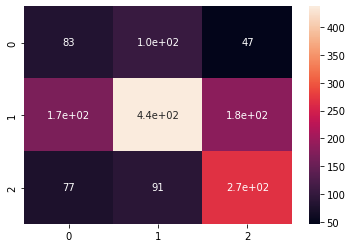

In [33]:
sns.heatmap(cm,annot =True)
plt.show()

In [34]:
acc_tfidf = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc_tfidf}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.5400410677618069


#MultinomialNB Algorithm

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 20 145  70]
 [ 28 712  49]
 [  5 182 250]]


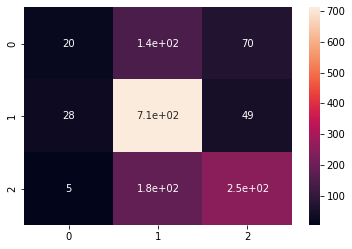

In [60]:
sns.heatmap(cm,annot =True)
plt.show()

In [61]:
acc_mnb = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of MultinomialNB: {acc_mnb}")

Accuracy of MultinomialNB: 0.6721423682409309


#Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_bow = DecisionTreeClassifier(random_state=42)

dt_bow.fit(X1_train, y1_train)
y1_pred = dt_bow.predict(X1_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 59 143  33]
 [176 500 113]
 [ 61 102 274]]


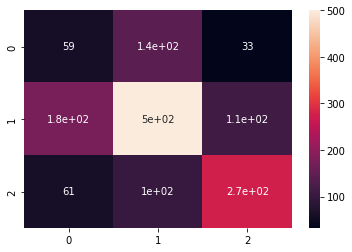

In [64]:
sns.heatmap(cm,annot =True)
plt.show()

In [65]:
acc_dt = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of Decision Tree: {acc_dt}")

Accuracy of Decision Tree: 0.5701574264202601


#SVM

In [66]:
from sklearn.svm import SVC

svm_bow = SVC(random_state=42)

svm_bow.fit(X1_train, y1_train)
y1_pred = svm_bow.predict(X1_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 14 178  43]
 [ 57 703  29]
 [  3 188 246]]


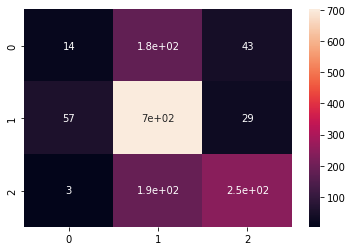

In [68]:
sns.heatmap(cm,annot =True)
plt.show()

In [69]:
acc_svm = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of SVM: {acc_svm}")

Accuracy of SVM: 0.6591375770020534


#Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_bow = RandomForestClassifier(random_state=42)

rf_bow.fit(X1_train, y1_train)

y1_pred = rf_bow.predict(X1_test)


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 36 153  46]
 [107 639  43]
 [ 13 143 281]]


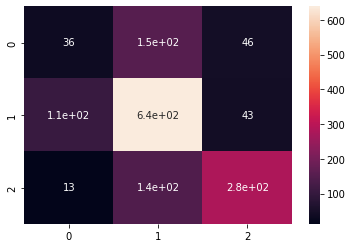

In [72]:
sns.heatmap(cm,annot =True)
plt.show()

In [73]:
acc_rf = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of Random Forest: {acc_rf}")

Accuracy of Random Forest: 0.6543463381245722


#XGBoost 

In [74]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X1_train, y1_train)

XGBClassifier(objective='multi:softprob')

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = classifier.predict(X1_test)
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 15 195  25]
 [ 14 751  24]
 [  2 240 195]]


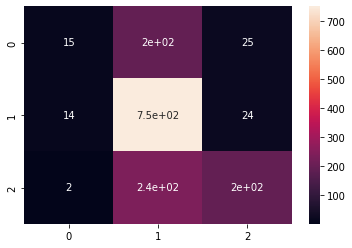

In [76]:
sns.heatmap(cm,annot=True)
plt.show()

In [110]:
acc_xgb = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of XGBoost: {acc_xgb}")

Accuracy of XGBoost: 0.6577686516084873


#CatBoost

In [35]:
!pip install catboost

In [36]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X1_train, y1_train)

Learning rate set to 0.085319
0:	learn: 1.0745799	total: 564ms	remaining: 9m 23s
1:	learn: 1.0532666	total: 842ms	remaining: 7m
2:	learn: 1.0367380	total: 1.12s	remaining: 6m 11s
3:	learn: 1.0210279	total: 1.42s	remaining: 5m 54s
4:	learn: 1.0073153	total: 1.74s	remaining: 5m 46s
5:	learn: 0.9950288	total: 2.04s	remaining: 5m 37s
6:	learn: 0.9846189	total: 2.34s	remaining: 5m 31s
7:	learn: 0.9746224	total: 2.59s	remaining: 5m 21s
8:	learn: 0.9668882	total: 2.88s	remaining: 5m 17s
9:	learn: 0.9583263	total: 3.38s	remaining: 5m 34s
10:	learn: 0.9528354	total: 3.85s	remaining: 5m 45s
11:	learn: 0.9472820	total: 4.1s	remaining: 5m 37s
12:	learn: 0.9423681	total: 4.42s	remaining: 5m 35s
13:	learn: 0.9367102	total: 4.74s	remaining: 5m 33s
14:	learn: 0.9325995	total: 5.03s	remaining: 5m 29s
15:	learn: 0.9260971	total: 5.32s	remaining: 5m 27s
16:	learn: 0.9210960	total: 5.61s	remaining: 5m 24s
17:	learn: 0.9171923	total: 5.87s	remaining: 5m 20s
18:	learn: 0.9135718	total: 6.16s	remaining: 5m 1

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = classifier.predict(X1_test)
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 40 159  36]
 [ 47 702  40]
 [ 10 166 261]]


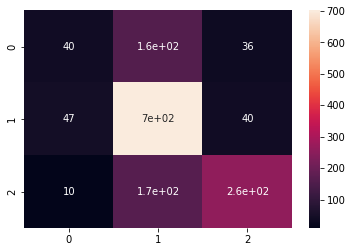

In [38]:
sns.heatmap(cm,annot=True)
plt.show()

In [39]:
acc_catb = accuracy_score(y1_test, y1_pred)

print(f"Accuracy of CatBoost: {acc_catb}")

Accuracy of CatBoost: 0.6865160848733745


#Transformers 

In [1]:
!pip install simpletransformers

In [40]:
import re

import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from simpletransformers.classification import ClassificationArgs, ClassificationModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [45]:
df = pd.read_csv('fincial_data.csv')
df = df.rename(columns={'Sentence': 'text', 'Sentiment': 'labels'})

In [46]:
def clean_sent(sent):
    sent = sent.lower()
    sent = re.sub('https?://\S+|www\.\S+', '', sent)
    sent = re.sub('[^a-zA-Z ]', '', sent)
    lemmatizer = WordNetLemmatizer()
    sent = " ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])
    stop_words = stopwords.words('english')
    currency_words = ['eur', 'dollar', 'usd', 'million', 'euro']
    month_words = ['january', 'jan', 'february', 'feb', 'march', 'mar',
                   'april', 'apr', 'may', 'june', 'jun', 'july', 'jul', 
                   'august', 'aug', 'september', 'sept', 'october', 'oct',
                   'november', 'nov', 'december', 'dec']
    country_words = ['russia', 'finland', 'america', 'usa', 'europe']
    freq_words = ['mn', 'mln', 'ha', 'wa', 'per', 'oyj', 'net', 'new', 'year', 
                  'said', 'unit', 'also', 'today',  'percent', 'share', 'company',  
                  'finnish', 'quarter', 'period', 'group', 'market', 'business', 
                  'service', 'operating']
    misc_words = ['allergen', 'barratt', 'bottled', 'buffett', 'crushed', 'endo',
                  'eng', 'erp',  'gdxj', 'god', 'imagine', 'jnug', 'junior', 'kior', 
                  'mondi', 'pcmag', 'scopi', 'ucell', 'word', 'yoku']
    all_stop_words = stop_words + currency_words + month_words + country_words + freq_words + misc_words
    all_stop_words.remove('not')
    sent = ' '.join([word for word in str(sent).split() if word not in all_stop_words])
    return sent

In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
df['text'] = df['text'].apply(clean_sent)

In [50]:
encoder = LabelEncoder()
df['labels'] = encoder.fit_transform(df['labels'])

In [51]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [52]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 4
model_args.max_seq_length = 64
model_args.train_batch_size = 32
model_args.learning_rate = 2e-5
model_args.warmup_ratio = 0.2
model_args.local_rank = -1

In [53]:
model = ClassificationModel(
    'distilbert',
    'distilbert-base-uncased',
    num_labels=3,
    args=model_args,
    use_cuda=True
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classi

In [54]:
model.train_model(train_df)

  0%|          | 0/4673 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/147 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/147 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/147 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/147 [00:00<?, ?it/s]

(588, 0.5720695788357534)

In [55]:
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=accuracy_score)
result

  0%|          | 0/1169 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/147 [00:00<?, ?it/s]

{'mcc': 0.5731553485442535,
 'acc': 0.7502138579982891,
 'eval_loss': 0.5635731625719135}

In [101]:
print(result)

{'mcc': 0.5731553485442535, 'acc': 0.7502138579982891, 'eval_loss': 0.5635731625719135}


In [108]:
acc_trf = result['acc']

print(f"Accuracy of Transformers: {acc_trf}")

Accuracy of Transformers: 0.7502138579982891


#LSTM

In [80]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# For Data Visualization
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
import wordcloud

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

In [83]:
df = pd.read_csv('fincial_data.csv')

In [84]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [85]:
tokenizer = Tokenizer(filters='"&(),-/:;<=>[\\]_`{|}~\t\n0123456789',
                      lower=True, split=' ')
tokenizer.fit_on_texts(np.array(df['Sentence']))
vocab_size = len(tokenizer.word_index) + 1

In [86]:
#https://www.kaggle.com/mushfirat/glove-pretrained-embeddings?select=glove.twitter.27B.100d.txt
embeddings_index = dict()
f = open('glove.twitter.27B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
maxlen = 30

In [90]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: {'negative':0, 'neutral':1, 'positive':2}.get(x))
texts = np.array(df['Sentence'])
texts = tokenizer.texts_to_sequences(texts)
for x in range(len(texts)):
    if len(texts[x])>maxlen:
        texts[x]=texts[x][:maxlen]
texts = pad_sequences(texts, maxlen=maxlen, dtype='float', padding='post', value=0.0)
texts = np.array(texts)
labels = df['Sentiment']
labels = np.array([float(j) for j in labels])

x_train = texts[:int(len(texts)*0.8)]
y_train = labels[:int(len(labels)*0.8)]
x_val = texts[int(len(texts)*0.8):]
y_val = labels[int(len(labels)*0.8):]

In [88]:
model = Sequential()
model.add(Input(shape=(maxlen)))
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(80, activation='relu',dropout=0.2, return_sequences=True))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(LSTM(256, activation='relu',dropout=0.2, return_sequences=False))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.summary()

2022-02-23 02:34:56.201922: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           1101700   
                                                                 
 lstm (LSTM)                 (None, 30, 80)            57920     
                                                                 
 time_distributed (TimeDistr  (None, 30, 64)           5184      
 ibuted)                                                         
                                                                 
 lstm_1 (LSTM)               (None, 256)               328704    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                        

In [93]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [94]:
epochs=300
mc = ModelCheckpoint('model.h5', monitor='val_sparse_categorical_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_data=(x_val, y_val), callbacks=[mc])

Epoch 1/300
19/19 [==============================] - ETA: 0s - loss: 1.0804 - sparse_categorical_accuracy: 0.4601
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.52524, saving model to model.h5
19/19 [==============================] - 13s 290ms/step - loss: 1.0804 - sparse_categorical_accuracy: 0.4601 - val_loss: 1.0598 - val_sparse_categorical_accuracy: 0.5252
Epoch 2/300
19/19 [==============================] - ETA: 0s - loss: 1.0196 - sparse_categorical_accuracy: 0.5384
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.52524
19/19 [==============================] - 5s 255ms/step - loss: 1.0196 - sparse_categorical_accuracy: 0.5384 - val_loss: 0.9925 - val_sparse_categorical_accuracy: 0.5252
Epoch 3/300
19/19 [==============================] - ETA: 0s - loss: 0.9828 - sparse_categorical_accuracy: 0.5384
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.52524
19/19 [==============================] - 5s 263ms/step - loss: 0.9828 - sparse_cat

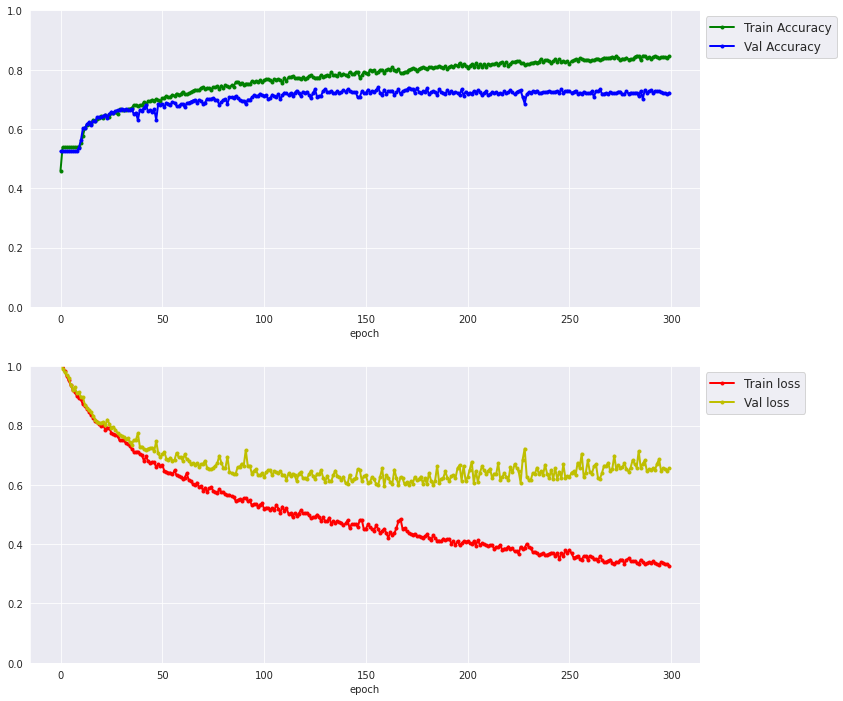

In [95]:
fig = plt.figure(figsize=(12,12))

fig.add_subplot(2, 1, 1).set_ylim(bottom=0)
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], '.b-', linewidth=2, label='Val Accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy','Val Accuracy'], loc='upper left',bbox_to_anchor=(1,1), prop={'size': 12})

fig.add_subplot(2, 1, 2).set_ylim(bottom=0)
plt.grid(True)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.plot(history.history['val_loss'], '.y-', linewidth=2)
plt.xlabel('epoch')
plt.legend(['Train loss','Val loss'], loc='upper left',bbox_to_anchor=(1,1), prop={'size': 12})

plt.show()


In [96]:
model = load_model('model.h5')

In [97]:
decode_label = {0:'negative', 1:'neutral', 2:'positive'}
y_pred = []
y_true = []
pred = model.predict(x_val)
pred = np.argmax(pred, axis=-1)
y = [decode_label[int(i)] for i in y_val]
pred = [decode_label[int(i)] for i in pred]
for i in pred:
    y_pred.append(i)
for i in y:
    y_true.append(i)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

    negative       0.52      0.40      0.45       185
     neutral       0.79      0.83      0.81       614
    positive       0.74      0.76      0.75       370

    accuracy                           0.74      1169
   macro avg       0.68      0.67      0.67      1169
weighted avg       0.73      0.74      0.74      1169



In [99]:
acc_lstm = accuracy_score(y_true, y_pred)

print(f"Accuracy of LSTM: {acc_lstm}")

Accuracy of LSTM: 0.7416595380667237


#Summary

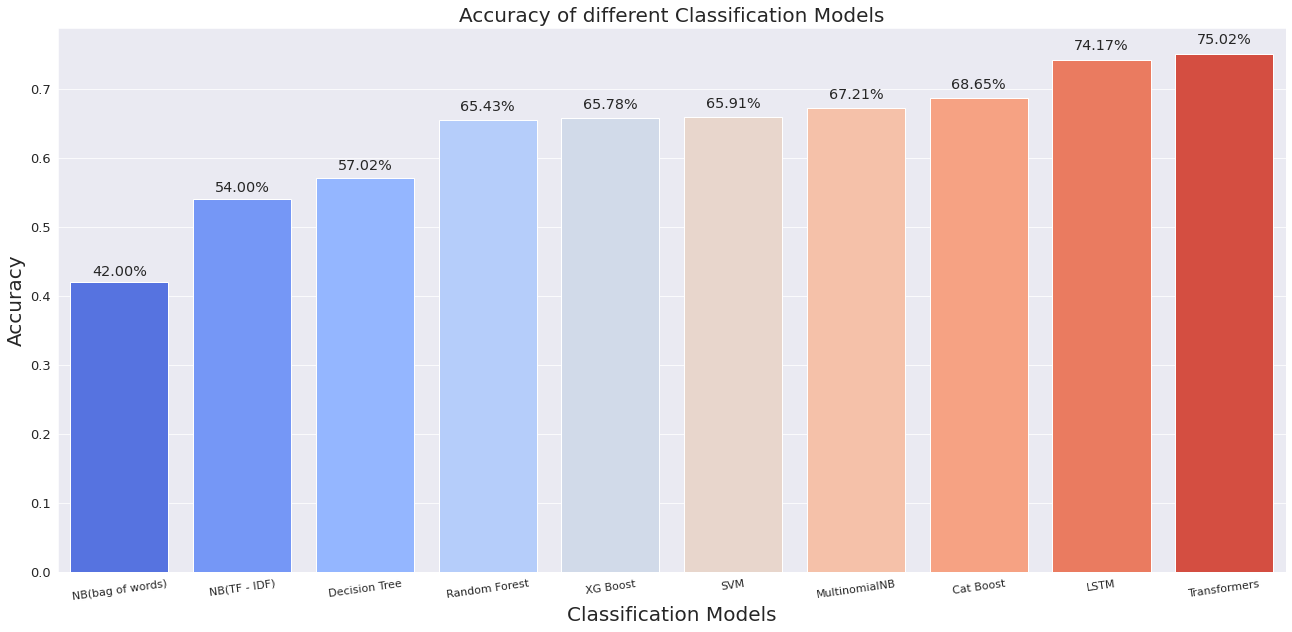

In [117]:
mylist=[]
mylist2=[]
mylist.append(acc_bow)
mylist2.append("NB(bag of words)")
mylist.append(acc_tfidf)
mylist2.append("NB(TF - IDF)")
mylist.append(acc_dt)
mylist2.append("Decision Tree")
mylist.append(acc_rf)
mylist2.append("Random Forest")
mylist.append(acc_xgb)
mylist2.append("XG Boost")
mylist.append(acc_svm)
mylist2.append("SVM")
mylist.append(acc_mnb)
mylist2.append("MultinomialNB")
mylist.append(acc_catb)
mylist2.append("Cat Boost")
mylist.append(acc_lstm)
mylist2.append("LSTM")
mylist.append(acc_trf)
mylist2.append("Transformers")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()